In [99]:
# Before starting the project, try all these imports FIRST

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

print('All prereqs installed.')
!pip list

All prereqs installed.
Package            Version
------------------ -----------
annotated-types    0.6.0
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
colorama           0.4.6
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
en-core-web-sm     3.7.1
executing          2.0.1
fonttools          4.51.0
html5lib           1.1
idna               3.7
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
joblib             1.4.0
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.7
murmurhash         1.0.10
nest-asyncio       1.6.0
nltk      

# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Aanandya Mittal

### [Link to Repository](https://github.com/AanandyaMittal/article-summarizer)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Question 1

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [97]:
response = requests.get("https://www.npr.org/2024/03/19/1239344999/young-voters-conservative-donald-trump-republican-party/")

#retrieve html
soup = BeautifulSoup(response.content, "html5lib")
text = soup.get_text(strip=True)

article_text = parsed.find("article").decode_contents()

# Save as html
with open("C:\\Users\\AanandyaMittal\\Documents\\article-summarizer\\article.html", "w", encoding="utf-8") as file:
    file.write(str(article_text))

print("Article saved as .html")

Article saved as .html


## Question 2

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [55]:
# Read
with open(r'C:\Users\AanandyaMittal\Documents\article-summarizer\article.html', 'rb') as file:
    html = file.read()

# HTML to text
soup = BeautifulSoup(html, 'html5lib')
text = soup.get_text()

# Sentiment analysis
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
sentiment = nlp(text)

polarity = sentiment._.polarity
print()
print(f"Polarity: {polarity}")

# Number of sentences
num_sen = text.count('.') + text.count('!') + text.count('?')
print(f"Number of sentences: {num_sen}")





Polarity: 0.11662967056584074
Number of sentences: 55


## Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [50]:
# Load
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Token Frequency
tokens = [
    token.text.lower() 
    for token in doc
    if not token.is_punct 
    and not token.is_stop 
    and not token.is_space 
]
freq_t = Counter(tokens)
common_tokens = freq_t.most_common(5)

# Print
print("5 Most Common Tokens:"),
for token, freq in common_tokens:
    print(f"{token}", end=" ")

print()
print("\nTokens/Frequencies:")
for token, freq in freq_t.items():
    print(f"Token: {token}   Frequency: {freq}")

5 Most Common Tokens:
trump bassett republican young conservatives 

Tokens/Frequencies:
Token: politics   Frequency: 3
Token: young   Frequency: 11
Token: conservatives   Frequency: 7
Token: grown   Frequency: 3
Token: trump   Frequency: 25
Token: republican   Frequency: 13
Token: party   Frequency: 4
Token: time   Frequency: 4
Token: vote   Frequency: 4
Token: march   Frequency: 1
Token: 19   Frequency: 1
Token: 20245:00   Frequency: 1
Token: et   Frequency: 1
Token: heard   Frequency: 1
Token: morning   Frequency: 1
Token: edition   Frequency: 1
Token: elena   Frequency: 1
Token: moore   Frequency: 1
Token: listen   Frequency: 1
Token: â   Frequency: 1
Token: 3:22   Frequency: 2
Token: toggle   Frequency: 3
Token: options   Frequency: 1
Token: download   Frequency: 1
Token: embed   Frequency: 2
Token: <   Frequency: 1
Token: iframe   Frequency: 1
Token: src="https://www.npr.org   Frequency: 1
Token: player   Frequency: 2
Token: embed/1239344999/1239388664   Frequency: 1
Token: width

## Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [51]:
# Load
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Lemma Frequency 
lemmas = [
        token.lemma_.lower() 
        for token in doc
        if not token.is_punct 
        and not token.is_stop 
        and not token.is_space 
]
freq_l = Counter(lemmas)
common_lemmas = freq_l.most_common(5)

# Print
print("5 Most Common Lemmas:"),
for lemma, freq in common_lemmas:
    print(f"{lemma}", end=" "),

print()
print("\nLemmas/Frequencies:")
for lemma, freq in freq_l.items():
    print(f"Lemma: {lemma}   Frequency: {freq}")

5 Most Common Lemmas:
trump bassett republican young conservative 

Lemmas/Frequencies:
Lemma: politics   Frequency: 1
Lemma: young   Frequency: 12
Lemma: conservative   Frequency: 9
Lemma: grow   Frequency: 3
Lemma: trump   Frequency: 25
Lemma: republican   Frequency: 13
Lemma: party   Frequency: 4
Lemma: time   Frequency: 4
Lemma: vote   Frequency: 5
Lemma: march   Frequency: 1
Lemma: 19   Frequency: 1
Lemma: 20245:00   Frequency: 1
Lemma: et   Frequency: 1
Lemma: hear   Frequency: 1
Lemma: morning   Frequency: 1
Lemma: edition   Frequency: 1
Lemma: elena   Frequency: 1
Lemma: moore   Frequency: 1
Lemma: listen   Frequency: 1
Lemma: â   Frequency: 1
Lemma: 3:22   Frequency: 2
Lemma: toggle   Frequency: 3
Lemma: option   Frequency: 1
Lemma: download   Frequency: 1
Lemma: embed   Frequency: 3
Lemma: <   Frequency: 1
Lemma: iframe   Frequency: 1
Lemma: src="https://www.npr.org   Frequency: 1
Lemma: player   Frequency: 2
Lemma: embed/1239344999/1239388664   Frequency: 1
Lemma: width="100

## Question 5

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Sentence Token Score: 0.5714285714285714


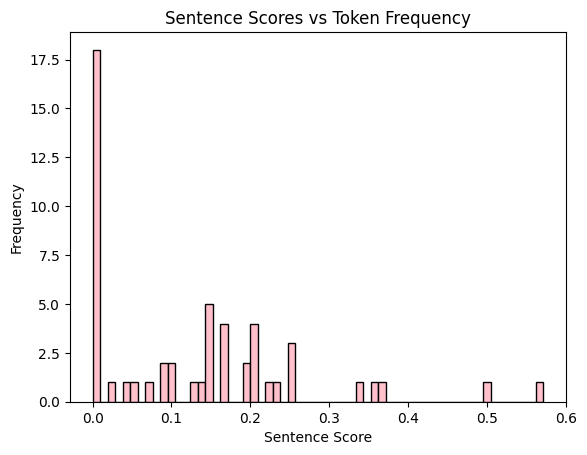

In [52]:
# Define
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    tokens = [
        token.text.lower() 
        for token in doc
        if not token.is_punct 
        and not token.is_stop 
        and not token.is_space 
    ]
    if tokens:
        return sum(token in interesting_tokens for token in tokens) / len(tokens)
    else:
        return 0
    
# Extract
sentence = next(doc.sents).text
freq_tokens = ['trump', 'bassett', 'republican', 'young', 'conservatives']

# Print
print(f"Sentence Token Score: {score_sentence_by_token(sentence, freq_tokens)}")

# Score all sentences
scores_by_token = [score_sentence_by_token(sentence.text, freq_tokens) for sentence in doc.sents]

# Plot
plt.figure()
plt.hist(scores_by_token, bins=60, color='pink', edgecolor='black')
plt.title('Sentence Scores vs Token Frequency')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.show()

# From my histogram, the most common range of token scores is 0.0-0.01

## Question 6

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Sentence Lemma Score: 0.42857142857142855


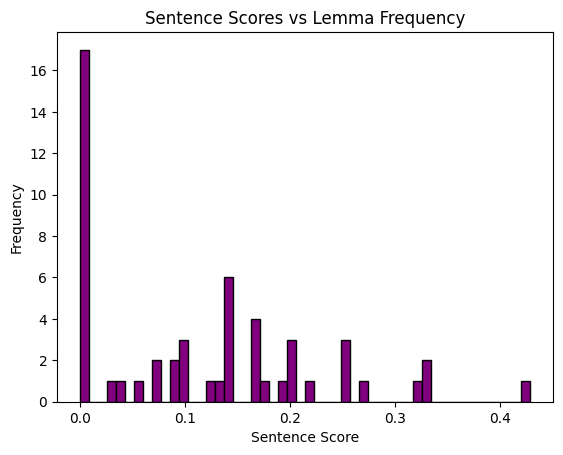

In [53]:
# Define
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [
        token.lemma_.lower() 
        for token in doc
        if not token.is_punct 
        and not token.is_stop 
        and not token.is_space 
    ]
    if lemmas:
        return sum(lemma in interesting_lemmas for lemma in lemmas) / len(lemmas) 
    else:
        return 0

# Extract
sentence = next(doc.sents).text
freq_lemmas = ['trump', 'bassett', 'republican', 'young', 'conservatives']

# Print
print(f"Sentence Lemma Score: {score_sentence_by_lemma(sentence, freq_lemmas)}")

# Score each sentence using lemmas
scores_by_lemma = [score_sentence_by_lemma(sentence.text, freq_lemmas) for sentence in doc.sents]

# Plot
plt.hist(scores_by_lemma, bins=50, color='purple', edgecolor='black')
plt.title('Sentence Scores vs Lemma Frequency')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.show()

# From my histogram, the most common range of lemma scores is 0.0-0.01

## Question 7

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.2
* Cutoff Score (lemmas): 0.2

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

## Question 8

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [93]:
# Add sentences to sun_sum
sen_sum = []
for sent in doc.sents:
    token_score = score_sentence_by_token(sent.text, freq_tokens)
    if token_score > 0.2 and sent.text.strip():
        sen_sum.append(sent.text.strip())

# Summary
summary_text = ' '.join(sen_sum)
print(summary_text)

Politics
    


      Young conservatives have grown up in Trump's Republican Party. Now, it's time to vote
   
   
   




      
            
                  
    
            March 19, 20245:00 AM ET
    
         
                        Heard on             Morning Edition
         
         

      
      

   
   

   
            
                  
                        
                              
    
      
        
      
    
  
      
      Elena Moore
    
  

            
         
         

      
   
   





      
      Young conservatives have grown up in Trump's Republican Party. "After that, I fell in love with it," Bassett remembered. "I dressed up as Trump," he said with a smile. Rylen Bassett
            
        
    

   
   Bassett isn't alone in feeling a pull toward the former president. So for many young conservatives casting their first ballot this year, Trump has been at the center of the Republican political world for much of their memory. "I

## Question 9

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [94]:
# Sentiment analysis
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
sentiment = nlp(summary_text)

polarity = sentiment._.polarity
print()
print(f"Polarity: {polarity}")

# Number of sentences
num_sen = summary_text.count('.') + summary_text.count('!') + summary_text.count('?')
print(f"Number of sentences: {num_sen}")


Polarity: 0.13863636363636364
Number of sentences: 9


## Question 10

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [95]:
# Add sentences to sun_sum
sen_sum = []
for sent in doc.sents:
    lemma_score = score_sentence_by_lemma(sent.text, freq_lemmas)
    if lemma_score > 0.2 and sent.text.strip():
        sen_sum.append(sent.text.strip())

# Summary
summary_text = ' '.join(sen_sum)
print(summary_text)

Politics
    


      Young conservatives have grown up in Trump's Republican Party. "After that, I fell in love with it," Bassett remembered. "I dressed up as Trump," he said with a smile. Rylen Bassett
            
        
    

   
   Bassett isn't alone in feeling a pull toward the former president. So for many young conservatives casting their first ballot this year, Trump has been at the center of the Republican political world for much of their memory. "If you've come of political consciousness in the last decade, then the Republican Party, to you, really does look like Trump." He cautioned that while Trump has had an influence on young conservatives, so has Biden. Back in Defiance County, Bassett and his friends recently founded a young Republican club, the Roosevelt Reagan Society. "


      
            young conservatives
      republican candidates
      Gen Z
      young voters
      young republicans
      presidential candidate
      trump
      world leaders
      Ohio

## Question 11

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [96]:
# Sentiment analysis
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
sentiment = nlp(summary_text)

polarity = sentiment._.polarity
print()
print(f"Polarity: {polarity}")

# Number of sentences
num_sen = summary_text.count('.') + summary_text.count('!') + summary_text.count('?')
print(f"Number of sentences: {num_sen}")


Polarity: 0.14047619047619048
Number of sentences: 8


## Question 12

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

There is a small difference. Without the cutoff the polarity is 0.17 as opposed to 0.14 for both tokens and lemmas. This is due to the cutoff making a small impact, but I think they relatively have the same score. The summary with the cutoff is also measuring sentiment based on a smaller amount of information which can impact that result.

## Question 13

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

There is no difference between the token summary and lemma summery so I think both have an equal amount of accuracy in representing the information. The similarity is probably due to both tokenization and lemmatization processing individual words.

In [2]:
!pip install spacy
!python -m pip install --upgrade pip
!python -m spacy download en_core_web_sm


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/8a/6a/19e9fe04fca059ccf770861c7d5721ab4c2aebc539889e97c7977528a53b/pip-24.0-py3-none-any.whl.metadata
  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 217.9 kB/s eta 0:00:59
     --------------------------------------- 0.0/12.8 MB 393.8 kB/s eta 0:00:33
     --------------------------------------- 0.1/12.8 MB 585.1 kB/s eta 0:00:22
     --------------------------------------- 0.1/12.8 MB 547.6 kB/s eta 0:00:24
     --------------------------------------- 0.1/12.8 MB 547.6 kB/s eta 0:00:24
      ----------

In [3]:
import spacy
spacy.load("en_core_web_sm")

In [98]:
!jupyter nbconvert --to html article-summarizer.ipynb

[NbConvertApp] Converting notebook article-summarizer.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 429765 bytes to article-summarizer.html
